<a href="https://colab.research.google.com/github/maxbshaw17/Date_Science_Final/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Whether a University Student Will Drop Out Or Not

## The Machine Learning Aspect of Max Bradshaw and Jake Dorick's Data Science Final Project

In [39]:
from ast import increment_lineno
# Import pandas and the dropout dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving dropout_dataset.csv to dropout_dataset (2).csv


In [40]:
import io
df = io.BytesIO(uploaded['dropout_dataset.csv'])

KeyError: 'dropout_dataset.csv'

In [41]:
df = pd.read_csv('dropout_dataset.csv')

In [42]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [43]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Automated Exploratory Data Analysis

In [95]:
# install the dtale package
!pip install dtale
# load the dtale
import dtale
# use show
dtale.show(df)

http://86236600b103:40000/dtale/main/2

### Supervised Machine Learning — Decision Trees

In [44]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Drop the answer (the Target column in this dataset's case)
X = df.drop('Target', axis = 1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)

In [45]:
# Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = dtree.predict(X_test)
# Print the classification report of the decision tree model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Dropout       0.66      0.68      0.67       275
    Enrolled       0.40      0.45      0.42       168
    Graduate       0.79      0.74      0.76       442

    accuracy                           0.66       885
   macro avg       0.62      0.62      0.62       885
weighted avg       0.67      0.66      0.67       885



In [47]:
# Let's see the confusion matrix now...
print(confusion_matrix(y_test,predictions))

[[186  50  39]
 [ 44  75  49]
 [ 51  64 327]]


Not great...

### Supervised Machine Learning — Artificial Neural Network

In [69]:
# Resetting these variables to avoid any mixups that may occur in previous code
X = df.drop('Target', axis = 1)
y = df['Target']

In [70]:
# Convert the target labels from words to numbers using label_encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Scaling the columns

In [72]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# Import the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
classifier = Sequential()

In [75]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [76]:
# Output layer
# SoftMax function will be used since the dependent variable has more than 2 categories
# The Target column is either Dropout, Graduate, or Enrolled (3 categories)
classifier.add(Dense(activation="softmax", units=3, kernel_initializer="uniform"))

In [78]:
# Compiling
# Used categorical crossentropy (rather than binary crossentropy) since there are three categories of analysis
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [79]:
# Fitting
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
354/354 [==============================] - 1s 1ms/step - loss: 0.8720 - accuracy: 0.6649
Epoch 2/100
354/354 [==============================] - 0s 1ms/step - loss: 0.6489 - accuracy: 0.7372
Epoch 3/100
354/354 [==============================] - 0s 1ms/step - loss: 0.6163 - accuracy: 0.7423
Epoch 4/100
354/354 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7460
Epoch 5/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7522
Epoch 6/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7530
Epoch 7/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7547
Epoch 8/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy: 0.7604
Epoch 9/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7587
Epoch 10/100
354/354 [==============================] - 0s 1ms/step - loss: 0.5709 - accura

In [82]:
# Predicting the test results
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

28/28 [==============================] - 0s 2ms/step


In [83]:
# Have to change the values back into words
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [84]:
# Create the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[215  32  37]
 [ 39  75  37]
 [ 19  32 399]]


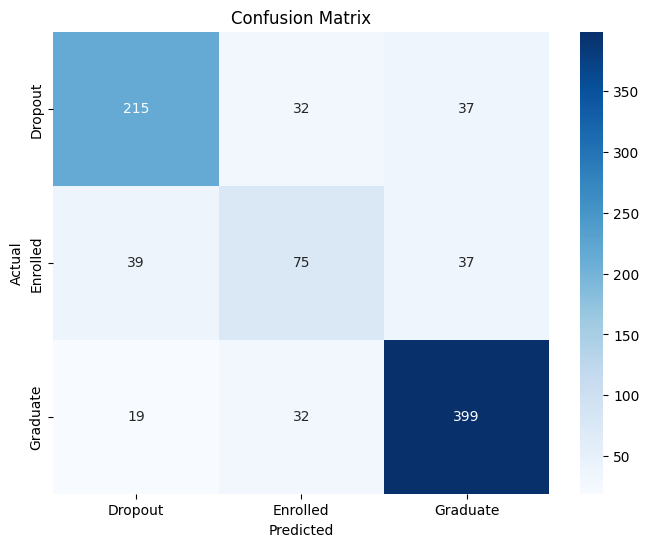

In [86]:
# Visual representation of the confusion matrix using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
# Calculate accuracy using sklearn.metric's function
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_original, y_pred_original)
print(accuracy)

0.7785310734463277


Better.

## Redoing the Artificial Neural Network **Without** the Enrolled Category

In [92]:
df2 = df[df['Target'] != 'Enrolled']
df2

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [98]:
X = df2.drop('Target', axis = 1)
y = df2['Target']

In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
classifier = Sequential()

In [103]:
# First hidden layer
classifier.add(Dense(activation="relu", input_dim=34, units=6, kernel_initializer="uniform"))
# Second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

In [104]:
# Two units instead of three now
classifier.add(Dense(activation="softmax", units=2, kernel_initializer="uniform"))

In [105]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [106]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
291/291 [==============================] - 2s 3ms/step - loss: 0.5014 - accuracy: 0.7789
Epoch 2/100
291/291 [==============================] - 1s 2ms/step - loss: 0.2836 - accuracy: 0.8963
Epoch 3/100
291/291 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.9067
Epoch 4/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.9132
Epoch 5/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9163
Epoch 6/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.9177
Epoch 7/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9160
Epoch 8/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9198
Epoch 9/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9211
Epoch 10/100
291/291 [==============================] - 0s 1ms/step - loss: 0.2213 - accura

In [107]:
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

23/23 [==============================] - 0s 1ms/step


In [108]:
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

In [109]:
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[244  52]
 [ 26 404]]


In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [116]:
accuracy = accuracy_score(y_test_original, y_pred_original)
print(accuracy)

0.8925619834710744


Wow!